In [1]:
import torch

import numpy as np
import xarray as xr 
from hydra import compose, initialize_config_dir
from omegaconf import OmegaConf
import lightning as pl
import hydra
import torch
import glob
import os 
work = os.environ['WORK']
with initialize_config_dir(config_dir=f"{work}/ipsl_dcpp/ipsl_dcpp/conf"):
    cfg = compose(config_name="config")
device = 'cuda'

pl.seed_everything(cfg.seed)
train = hydra.utils.instantiate(
    cfg.dataloader.dataset,domain='train',debug=True
)
metric_output = torch.rand((5,34))


/tmp/xpython_2587931/2326050762.py:13: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize_config_dir(config_dir=f"{work}/ipsl_dcpp/ipsl_dcpp/conf"):
[rank: 0] Seed set to 0
2it [00:02,  1.22s/it]


In [2]:
os.getcwd()

'/lustre/fswork/projects/rech/mlr/udy16au/ipsl_dcpp/ipsl_dcpp/conf/module'

In [4]:
metric_outputs = torch.load('../../ddpm_elevation_scaled_1000_timesteps_sharpnesses.pt')

In [14]:
import pandas as pd

df = pd.DataFrame(metric_output.numpy())

In [20]:
df = round(df,3)


In [21]:
var_names = train.surface_variables.copy()
plev_var_names = [[x+'_850',x+'_750',x+'_500'] for x in train.plev_variables]
for x in plev_var_names:
    for name in x:
        var_names.append(name)
# var_names = [(var_names[index], 0, index) for index in range(len(var_names))]

In [22]:
df.columns = var_names

In [23]:
metrics_names = ['error','var','spskr','crps','sharpness']

In [24]:
df.index = metrics_names

In [25]:
df

,tas,npp,nbp,gpp,cVeg,evspsbl,mrfso,mrro,ps,tos,...,ua_500,va_850,va_750,va_500,wap_850,wap_750,wap_500,zg_850,zg_750,zg_500
error,0.496,0.768,0.088,0.132,0.307,0.634,0.490,0.896,0.456,0.632,...,0.419,0.553,0.953,0.036,0.185,0.373,0.305,0.932,0.176,0.270
var,0.151,0.032,0.208,0.930,0.723,0.742,0.526,0.244,0.585,0.033,...,0.153,0.242,0.726,0.701,0.204,0.651,0.774,0.437,0.519,0.616
spskr,0.810,0.980,0.115,0.317,0.697,0.914,0.935,0.941,0.600,0.065,...,0.858,0.687,0.005,0.176,0.750,0.605,0.110,0.212,0.970,0.837
crps,0.282,0.374,0.024,0.491,0.123,0.114,0.472,0.575,0.295,0.797,...,0.375,0.256,0.325,0.090,0.394,0.607,0.174,0.474,0.858,0.449
sharpness,0.514,0.457,0.601,0.818,0.974,0.818,0.975,0.464,0.051,0.263,...,0.404,0.402,0.051,0.068,0.422,0.506,0.273,0.688,0.050,0.466


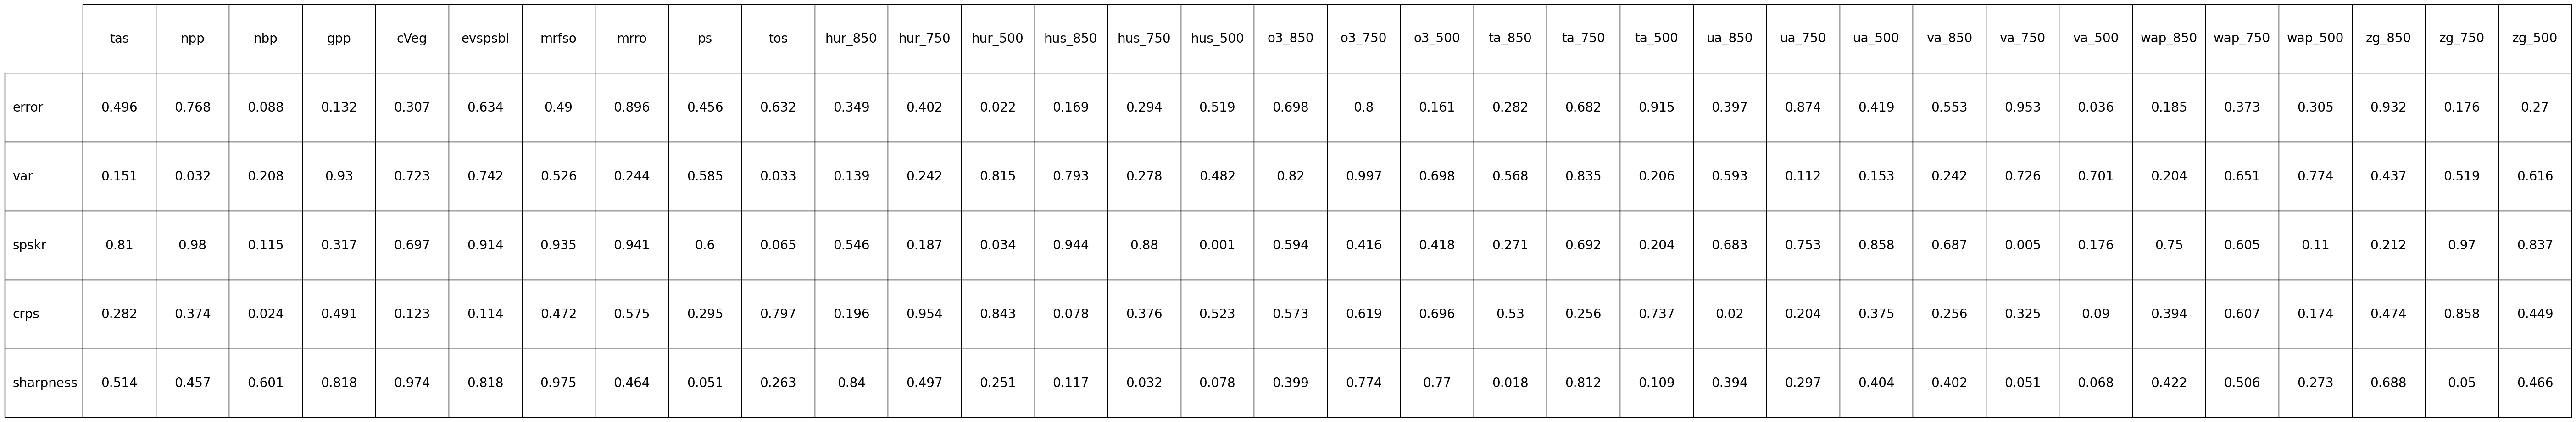

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 2))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)  # No boundary box

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index,cellLoc='center', loc='center')

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(14, 9)  # Adjust scaling as needed

# Save the table as an image
plt.savefig('table_image.png', bbox_inches='tight', dpi=300)  # Save as PNG (use 'table_image.jpg' for JPEG)

# plt.show()